<a href="https://colab.research.google.com/github/Novice1414/Final_Year_Project/blob/main/PIMA_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [49]:
diabetes_df = diabetes_df.rename(columns={'Outcome': 'DO'})

In [50]:
diabetes_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DO
0,6,148,72,35,,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [51]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
DO                          0
dtype: int64

In [52]:
diabetes_df.replace(' ', np.nan, inplace=True)  # Replace empty strings with NaN
diabetes_df = diabetes_df.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, converting non-convertible values to NaN
diabetes_df.fillna(diabetes_df.mean(), inplace=True)  # Replace NaN values with the mean of the column


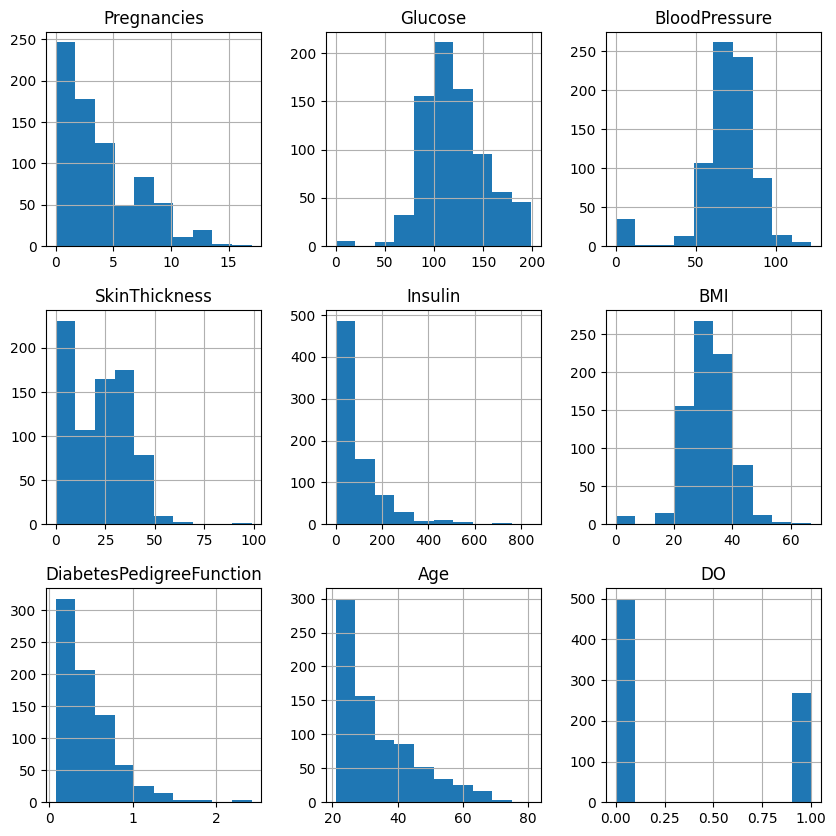

In [53]:
diabetes_df.hist(figsize=(10, 10))
plt.show()

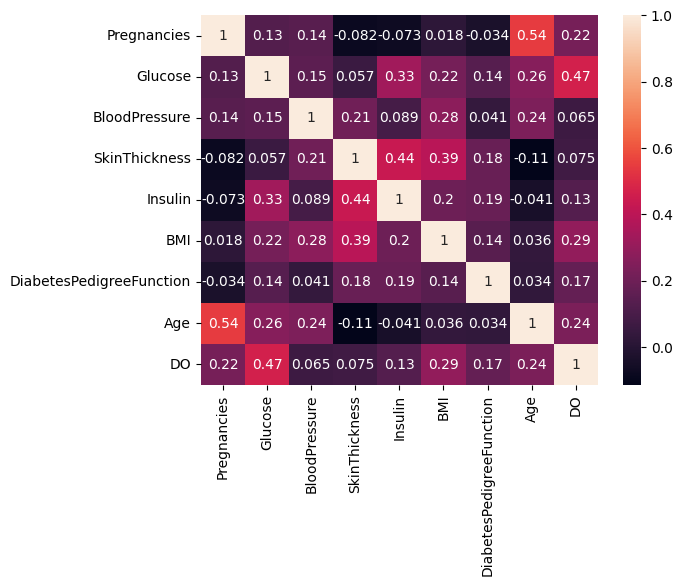

In [54]:
sns.heatmap(diabetes_df.corr(), annot=True)
plt.show()

In [55]:
diabetes_df = diabetes_df.dropna()

** Checking that which columns have higher outliers**

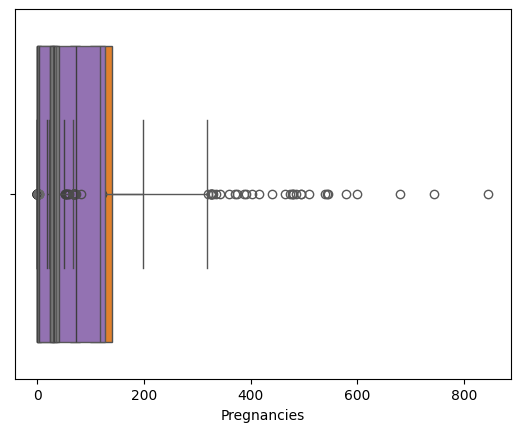

In [56]:
import seaborn as sns

# Create a boxplot for each column
for col in diabetes_df.columns:
    sns.boxplot(x=diabetes_df[col])

**Printing the columns having higher outliers**

In [57]:
# Calculate the interquartile range for each column
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Count the number of outliers for each column
num_outliers = ((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).sum()

In [58]:
# Sort columns by number of outliers
sorted_cols = num_outliers.sort_values(ascending=False)

# Print columns with most outliers
print(sorted_cols.head())

BloodPressure               45
Insulin                     34
DiabetesPedigreeFunction    29
BMI                         19
Age                          9
dtype: int64


**Removing the outliers**

In [59]:
import numpy as np

# Calculate IQR for each column
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Determine which values are outliers
outliers = ((diabetes_df < (Q1 - threshold * IQR)) | (diabetes_df > (Q3 + threshold * IQR)))

# Remove rows containing outliers
clean_df = diabetes_df[~outliers.any(axis=1)]

In [61]:
x=diabetes_df.drop(['DO'], axis=1)
y=diabetes_df['DO']

In [62]:
y.value_counts()

DO
0    500
1    268
Name: count, dtype: int64

<Axes: ylabel='count'>

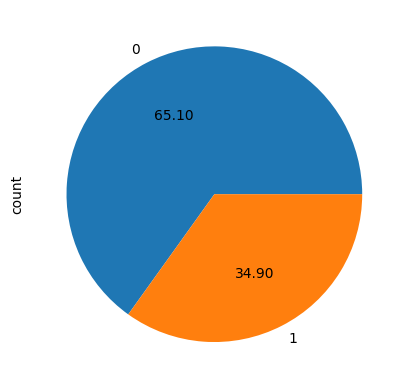

In [63]:
y.value_counts().plot.pie(autopct = '%.2f')

In [64]:
diabetes_df = diabetes_df.dropna()

**Random Oversampling**

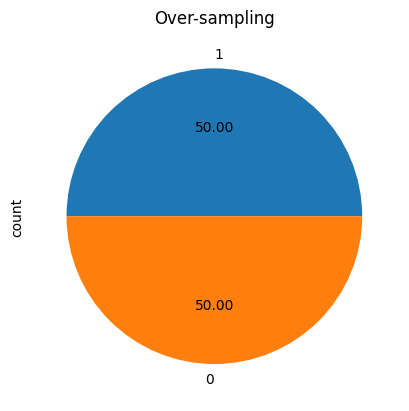

In [65]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [66]:
y_res.value_counts()

DO
1    500
0    500
Name: count, dtype: int64

**Splitting the train and test data from the dataset**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X = diabetes_df.drop('DO', axis=1)
# y = diabetes_df['DO']

X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size=0.2, random_state=42)



**Feature Scaling**

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Applying ANN**

In [70]:
import tensorflow as tf


In [71]:
ann = tf.keras.models.Sequential()

**Adding the input layers and hidden layers**

In [72]:
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

**Output Layer**

In [73]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [74]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

**Training the ANN on training Set**

In [81]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=200,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])



Accuracy: 0.9037500023841858


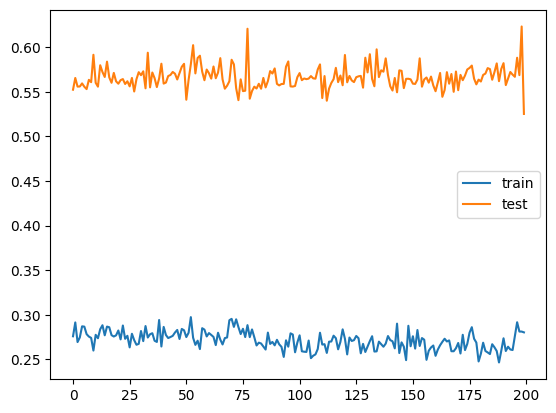

In [82]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [84]:
y_pred = ann.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

7/7 [==============================] - 0s 2ms/step


In [85]:
y_test_classes = y_test.values.astype(int)

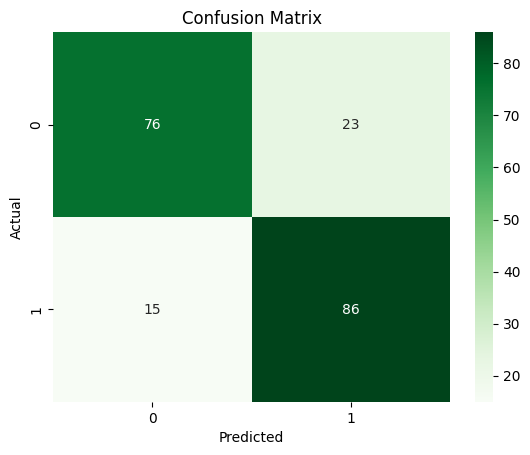

In [86]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm,cmap="Greens",annot = True, xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [87]:
from sklearn.metrics import recall_score,precision_score,f1_score
recall = recall_score(y_test_classes,y_pred_classes)
precision = precision_score(y_test_classes,y_pred_classes)
F1_Score = f1_score(y_test_classes,y_pred_classes)

print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"F1_Score: {F1_Score}")

recall: 0.8514851485148515
precision: 0.7889908256880734
F1_Score: 0.819047619047619


**Hyperparameter Tuning**

Early Stopping

In [88]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.00001,patience=20,verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [89]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=200, callbacks=callback)


Epoch 1/200
25/25 [==============================] - 0s 10ms/step - loss: 0.2806 - accuracy: 0.8950 - val_loss: 0.5869 - val_accuracy: 0.7850
Epoch 2/200
25/25 [==============================] - 0s 7ms/step - loss: 0.2845 - accuracy: 0.9013 - val_loss: 0.5369 - val_accuracy: 0.8050
Epoch 3/200
25/25 [==============================] - 0s 7ms/step - loss: 0.2695 - accuracy: 0.9000 - val_loss: 0.5463 - val_accuracy: 0.8050
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.2698 - accuracy: 0.9038 - val_loss: 0.5761 - val_accuracy: 0.8000
Epoch 5/200
25/25 [==============================] - 0s 7ms/step - loss: 0.2563 - accuracy: 0.9125 - val_loss: 0.5760 - val_accuracy: 0.8100
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.9137 - val_loss: 0.5720 - val_accuracy: 0.8050
Epoch 7/200
25/25 [==============================] - 0s 7ms/step - loss: 0.2576 - accuracy: 0.9100 - val_loss: 0.5633 - val_accuracy: 0.8100
Epoch 8/200


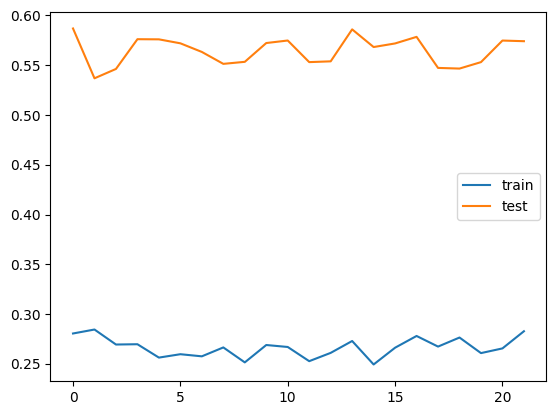

In [91]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [92]:
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9024999737739563


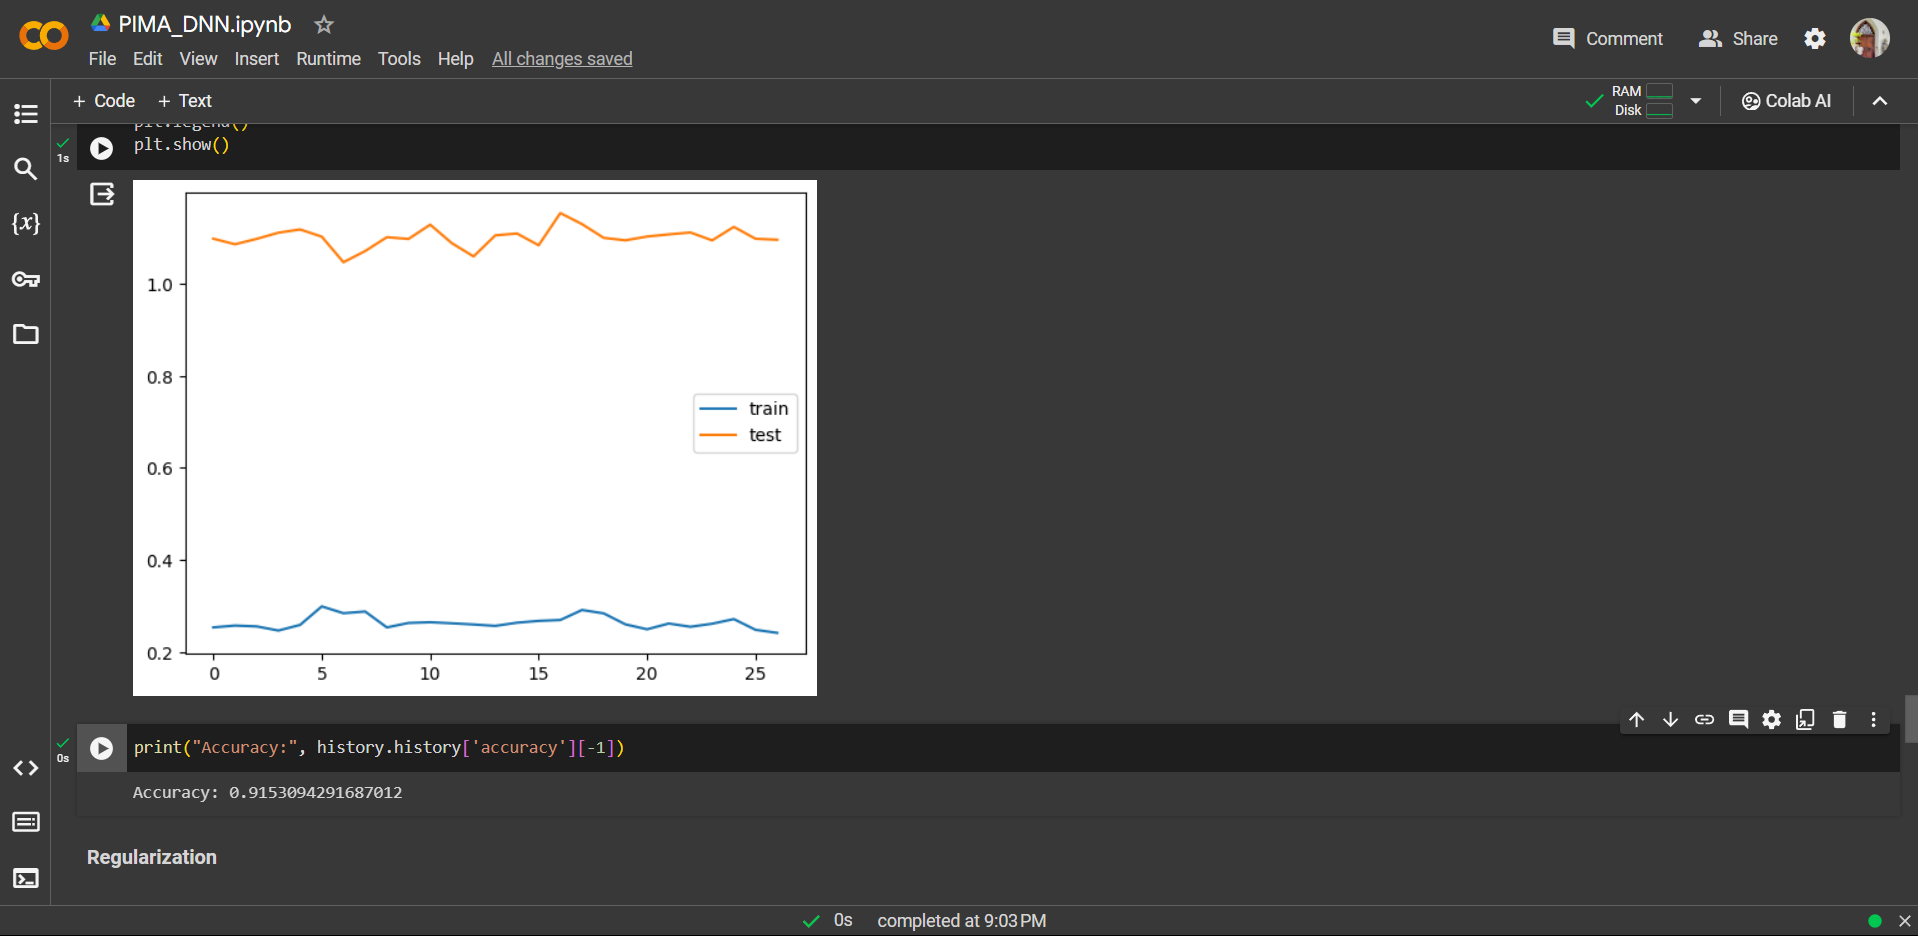

**Regularization**

L1 regularization

In [105]:
ann2 = tf.keras.models.Sequential()


ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
ann2.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
ann2.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
#ann2.add(tf.keras.layers.Dropout(0.2))
ann2.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))

In [106]:
ann2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [107]:
ann2.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [111]:
history = ann2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=1200,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9150000214576721


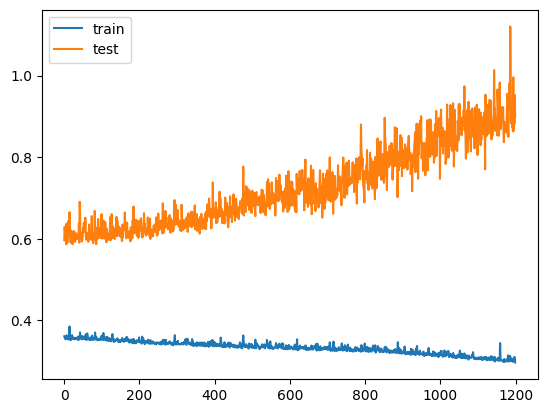

In [112]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

L2 Regularization

In [113]:
ann3 = tf.keras.models.Sequential()


ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann3.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann3.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
#ann2.add(tf.keras.layers.Dropout(0.2))
ann3.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [114]:
ann3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [116]:
ann3.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [120]:
history = ann3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3200,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9175000190734863


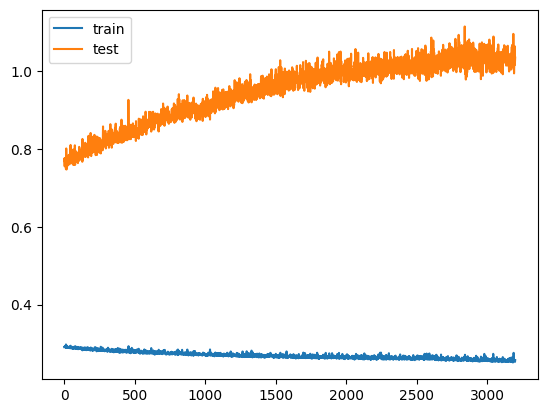

In [121]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

**Performance Matrix**

In [122]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [123]:
y_pred = ann3.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

7/7 [==============================] - 0s 2ms/step


In [124]:
y_test_classes = y_test.values.astype(int)

Confusion Matrix

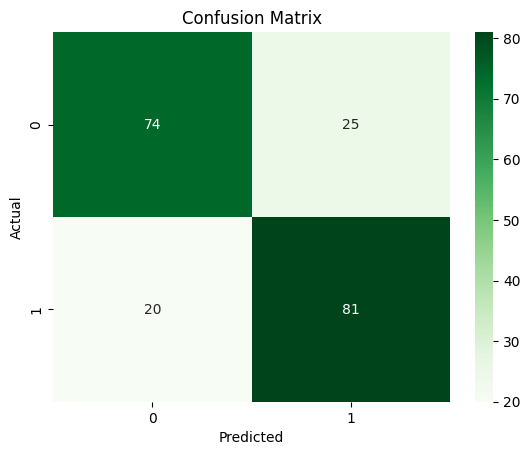

In [127]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm,cmap="Greens",annot = True, xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [126]:
# Precision
precision = precision_score(y_test_classes, y_pred_classes)
print("Precision:", precision)

# Recall
recall = recall_score(y_test_classes, y_pred_classes)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test_classes, y_pred_classes)
print("F1 Score:", f1)

Precision: 0.7641509433962265
Recall: 0.801980198019802
F1 Score: 0.782608695652174
